In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset to the python environment.


In [2]:
#read the dataset
data=pd.read_excel('iris (2).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Do necessary pre-processing steps.


In [6]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

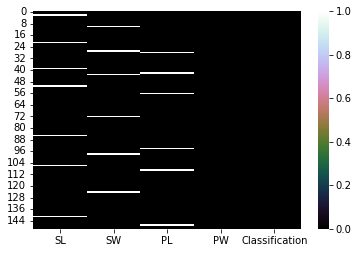

In [7]:
t=data.isnull()
sns.heatmap(t,cmap='cubehelix')

There are null values in SL,SW,PL so we need to handle those null values

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

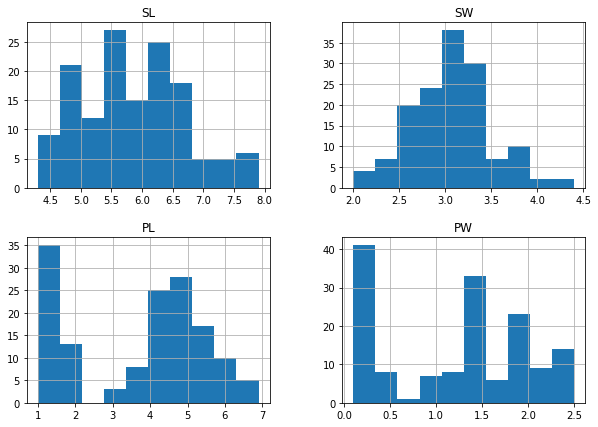

In [8]:
data.hist(figsize=(10,7))

In [9]:
#fill the null values with median
data['SL']=data['SL'].fillna(data['SL'].median())

In [10]:
#fill the null values with median
data['SW']=data['SW'].fillna(data['SW'].median())

In [11]:
#fill the null values with median
data['PL']=data['PL'].fillna(data['PL'].median())

<AxesSubplot:>

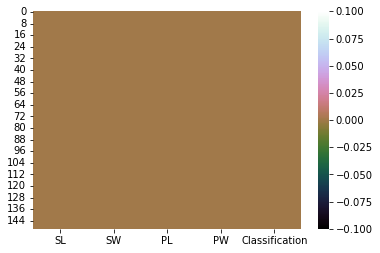

In [12]:
t=data.isnull()
sns.heatmap(t,cmap='cubehelix')

Hence we handle the null values.

{'whiskers': [<matplotlib.lines.Line2D at 0x20f211dda90>,
 'caps': [<matplotlib.lines.Line2D at 0x20f211ea130>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f211dd7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20f211ea610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f211ea8e0>],
 'means': []}

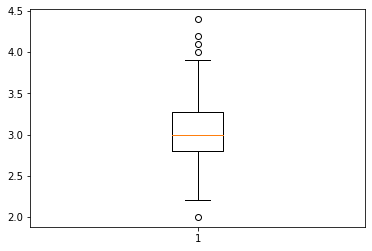

In [13]:
plt.boxplot(data['SW'])

There are outliers in the SW column so we need to handle it

In [14]:
 for x in range(1,7):
    Q1=np.percentile(data['SW'],25, interpolation='midpoint')
    Q2=np.percentile(data['SW'],50, interpolation='midpoint')
    Q3=np.percentile(data['SW'],75, interpolation='midpoint')
    iqr=Q3-Q1
    low_lim=Q1-1.5*iqr
    up_lim=Q3+1.5*iqr
    ind1=data['SW']>up_lim
    ind2=data['SW']<low_lim
    q=data.loc[ind1].index
    r=data.loc[ind2].index
    data.drop(q, inplace=True)
    data.drop(r,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x20f212baf10>,
 'caps': [<matplotlib.lines.Line2D at 0x20f212ca4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f212bac40>],
 'medians': [<matplotlib.lines.Line2D at 0x20f212caa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f212cad60>],
 'means': []}

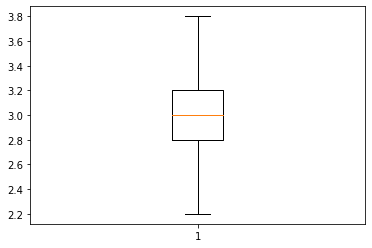

In [15]:
plt.boxplot(data['SW'])

Handled the outliers

In [16]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        44
Name: Classification, dtype: int64

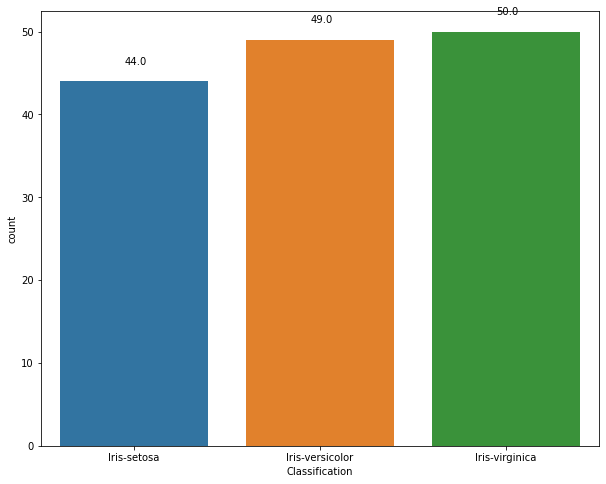

In [17]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data['Classification'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35,p.get_height()+2.01))
plt.show()

 we have more data in Iris-virginica 


In [18]:
#using label encoder hot encoder to transform data
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])

In [19]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [20]:
#selecting variables x and y
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [21]:
#Splitting the dataset to test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [22]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(x_train,y_train)
pred = l_model.predict(x_test)

In [23]:
print('Accuracy Score of Logistic model:', accuracy_score(y_test, pred))

Accuracy Score of Logistic model: 1.0


In [24]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [25]:
print('Accuracy Score of Random forest model:', accuracy_score(y_test, y_pred))

Accuracy Score of Random forest model: 1.0


In [26]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
pred_SVC= classifier.predict(x_test)

In [27]:
print('Accuracy Score of SVM is:', accuracy_score(y_test, pred_SVC))

Accuracy Score of SVM is: 1.0


In [28]:
#KNN MODEL
#Importing KNN model and fitting the model
from sklearn.neighbors import KNeighborsClassifier
acc_value = []
neighbours = np.arange(3,15)
for k in neighbours:
     classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
     classifier.fit(x_train,y_train)
     pred = classifier.predict(x_test)
     acc = accuracy_score(y_test,pred)
     acc_value.append(acc)

Text(0, 0.5, 'accuracy')

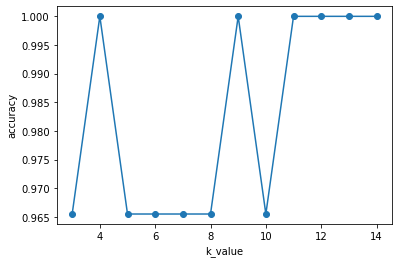

In [29]:
plt.plot(neighbours, acc_value, 'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [30]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

In [31]:
print('Accuracy Score is:', accuracy_score(y_test, pred))

Accuracy Score is: 1.0


**Here we got 100% accuracy in all model that is Logistic model,SVM model,Random Forest model,KNN model. So we can predict species of plants with any of these models**